# Punctuation prediction using pretrained BERT model on NER task

## Installing requirements (please install [pytorch](https://pytorch.org/get-started/locally/) compatible with your cuda version before)

In [ ]:
!pip install simpletransformers
!pip install pandas

## Check your cuda and gpu

In [1]:
!nvidia-smi

Wed Dec 28 21:50:04 2022       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  NVIDIA GeForce ...  Off  | 00000000:0B:00.0  On |                  N/A |
| 30%   50C    P8    33W / 350W |    902MiB / 24245MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

## Our covered punctuations

In [2]:
special_labels = {',': 'I-COMMA',
                  '.': 'I-DOT',
                  '?': 'I-QMARK',
                  '!': 'I-EMARK',
                  ':': 'I-COLON',
                  ';': 'I-SEMICOLON'}
normal_label = 'O'

In [3]:
labels_set = list(special_labels.values()) + [normal_label]

In [4]:
from simpletransformers.ner import NERModel, NERArgs
import pandas as pd

In [5]:
model_args = NERArgs()
model_args.overwrite_output_dir = True
model_args.save_steps = -1
model = NERModel('bert',
                 'bert-base-uncased',
                 labels = labels_set,
                 args=model_args,
                 use_cuda=True)

Some weights of the model checkpoint at bert-base-uncased were not used when initializing BertForTokenClassification: ['cls.predictions.transform.dense.bias', 'cls.predictions.decoder.weight', 'cls.seq_relationship.weight', 'cls.seq_relationship.bias', 'cls.predictions.transform.dense.weight', 'cls.predictions.transform.LayerNorm.bias', 'cls.predictions.transform.LayerNorm.weight', 'cls.predictions.bias']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of BertForTokenClassification were not initialized from the model checkpoint at bert-base-u

## Training bins 1 to 9. 

In [7]:
binz = 10
for i in range(binz-1):
    print(f'\t\t\t\t\t\tBin {i+1} out of {binz}')
    bin = pd.read_csv(f'./preprocessed_wikitext/train{i}-{binz}.csv').dropna()
    model.train_model(bin, output_dir=f'./bert_models/{i}')
    del bin


						Bin 1 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10708 [00:00<?, ?it/s]

/home/mostafa/anaconda3/lib/python3.9/site-packages/torch/optim/lr_scheduler.py:131: UserWarning: Detected call of `lr_scheduler.step()` before `optimizer.step()`. In PyTorch 1.1.0 and later, you should call them in the opposite order: `optimizer.step()` before `lr_scheduler.step()`.  Failure to do this will result in PyTorch skipping the first value of the learning rate schedule. See more details at https://pytorch.org/docs/stable/optim.html#how-to-adjust-learning-rate
  warnings.warn("Detected call of `lr_scheduler.step()` before `optimizer.step()`. "


						Bin 2 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10854 [00:00<?, ?it/s]

						Bin 3 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10849 [00:00<?, ?it/s]

						Bin 4 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10813 [00:00<?, ?it/s]

						Bin 5 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10772 [00:00<?, ?it/s]

						Bin 6 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10780 [00:00<?, ?it/s]

						Bin 7 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10903 [00:00<?, ?it/s]

						Bin 8 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10784 [00:00<?, ?it/s]

						Bin 9 out of 10


  0%|          | 0/45 [00:00<?, ?it/s]

Epoch:   0%|          | 0/1 [00:00<?, ?it/s]

Running Epoch 0 of 1:   0%|          | 0/10803 [00:00<?, ?it/s]

## Testing on the last bin of the dataset

In [8]:
testdf = pd.read_csv('./preprocessed_wikitext/train9-10.csv').dropna()

In [9]:
result, model_outputs, predictions = model.eval_model(testdf)
groups = [df for _, df in testdf.groupby('sentence_id')]
print(len(predictions) == len(groups))

  0%|          | 0/45 [00:00<?, ?it/s]

Running Evaluation:   0%|          | 0/10854 [00:00<?, ?it/s]

True


In [10]:
trues = []
for i, sentence in enumerate(predictions):
    trues.append(groups[i]['labels'].to_list()[:len(sentence)])

In [12]:
print(len(trues) == len(predictions))

True


In [13]:
import itertools
ps = list(itertools.chain.from_iterable(predictions))
ts = list(itertools.chain.from_iterable(trues))

## Evaluation

In [14]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

cm = confusion_matrix(y_true=ts,y_pred=ps, labels=labels_set)
cm

array([[ 306498,    2850,       7,       9,     981,    1737,   81645],
       [   1276,  247998,      63,      11,     347,      95,   13992],
       [     24,      87,     359,       4,       3,       0,     262],
       [     31,     263,      12,      65,       4,       0,     719],
       [   1729,     971,       1,       1,    6893,     568,    3967],
       [   3866,    1349,       0,       0,     269,    7293,    1485],
       [  65413,   10843,      61,      34,     945,     566, 6269280]])

### Normalizing the confusion matrix

In [15]:
import numpy as np
summ = np.sum(cm, axis=1)
summ = np.expand_dims(summ, axis=1)
nor_cm = (cm/summ)
nor_cm

array([[7.78453091e-01, 7.23851806e-03, 1.77788163e-05, 2.28584781e-05,
        2.49157411e-03, 4.41168627e-03, 2.07364494e-01],
       [4.83732779e-03, 9.40162710e-01, 2.38833582e-04, 4.17011017e-05,
        1.31548021e-03, 3.60145878e-04, 5.30438013e-02],
       [3.24763194e-02, 1.17726658e-01, 4.85791610e-01, 5.41271989e-03,
        4.05953992e-03, 0.00000000e+00, 3.54533153e-01],
       [2.83363803e-02, 2.40402194e-01, 1.09689214e-02, 5.94149909e-02,
        3.65630713e-03, 0.00000000e+00, 6.57221207e-01],
       [1.22363765e-01, 6.87190375e-02, 7.07714084e-05, 7.07714084e-05,
        4.87827318e-01, 4.01981599e-02, 2.80750177e-01],
       [2.71069976e-01, 9.45870144e-02, 0.00000000e+00, 0.00000000e+00,
        1.88613098e-02, 5.11358856e-01, 1.04122844e-01],
       [1.03058983e-02, 1.70832794e-03, 9.61062475e-06, 5.35674166e-06,
        1.48885908e-04, 8.91739936e-05, 9.87732746e-01]])

In [16]:
nor_cm.sum(axis=1)

array([1., 1., 1., 1., 1., 1., 1.])

Text(114.0, 0.5, 'True Label')

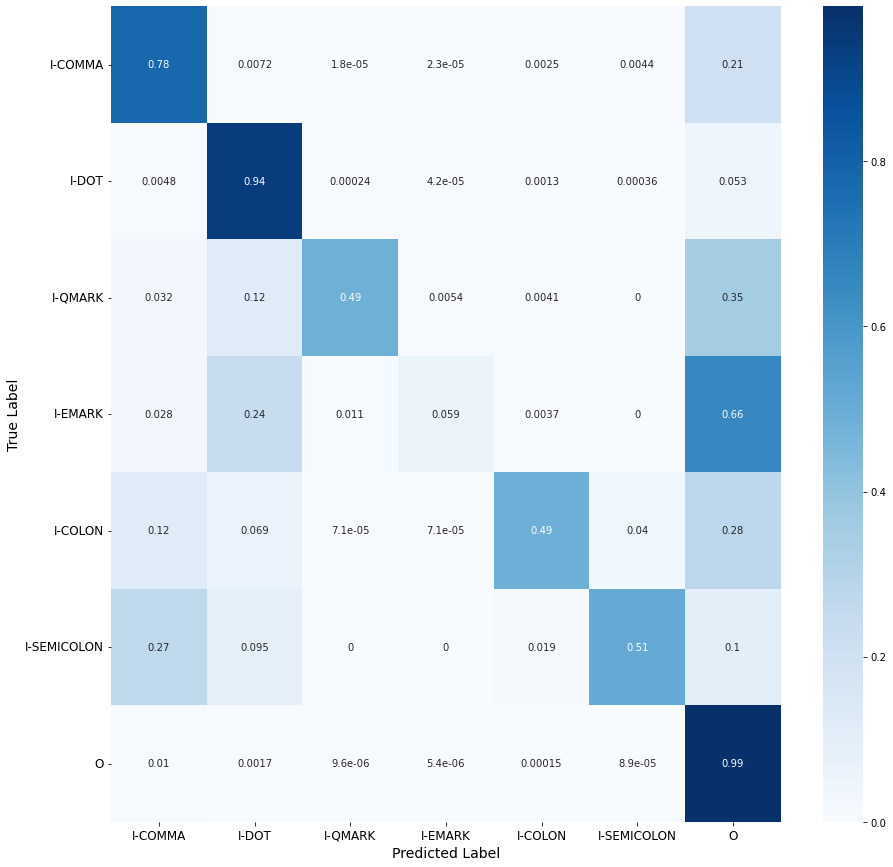

In [17]:


plot_labels = labels_set
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(nor_cm,
            ax=ax, 
            annot=True,
            cmap='Blues',
            xticklabels=plot_labels,
            yticklabels=plot_labels)
plt.yticks(rotation=0,size=12)
plt.xticks(size=12)
ax.set_xlabel('Predicted Label',size=14)
ax.set_ylabel('True Label',size=14)